<a href="https://colab.research.google.com/github/LucasPequenoSterzeck/Machine_Learning_LPS/blob/main/Regress%C3%A3o_Logistica_%5BTitanic%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Logística

Nesse notebook estarei abordando uma aplicação direta de regressão logística com sckit-learn

Iremos utilizar o dataset Titanic

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Criar um conjunto de dados fictício
np.random.seed(42)
n = 100  # número de amostras
hours_study = np.random.randint(1, 10, n)  # horas de estudo (variável independente)
hours_sleep = np.random.randint(4, 10, n)  # horas de sono (variável independente)
approval = np.where((hours_study >= 5) & (hours_sleep >= 6), 1, 0)  # variável dependente (0 = Reprovado, 1 = Aprovado)

data = pd.DataFrame({'Hours_Study': hours_study, 'Hours_Sleep': hours_sleep, 'Approval': approval})


In [25]:
# Visualizando dataframe fictcio que criamos acima:
display(data.head())

,Hours_Study,Hours_Sleep,Approval
0,7,6,1
1,4,8,0
2,8,9,1
3,5,6,1
4,7,4,0


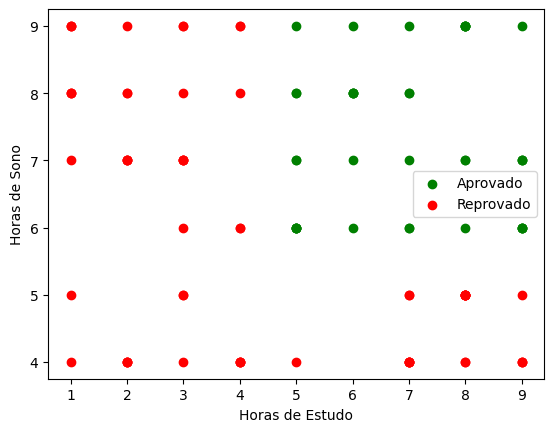

In [17]:
# Visualização dos dados
plt.scatter(data[data['Approval'] == 1]['Hours_Study'], data[data['Approval'] == 1]['Hours_Sleep'], c='green', label='Aprovado')
plt.scatter(data[data['Approval'] == 0]['Hours_Study'], data[data['Approval'] == 0]['Hours_Sleep'], c='red', label='Reprovado')
plt.xlabel('Horas de Estudo')
plt.ylabel('Horas de Sono')
plt.legend()
plt.show()

In [20]:
# Separar as variáveis independentes (X) e a variável dependente (y)
X = data[['Hours_Study', 'Hours_Sleep']]
y = data['Approval']

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)
print('Modelo treinado')

Modelo treinado


In [23]:
# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"\nAcurácia do modelo: {round(accuracy*100,2)}%\n")


Acurácia do modelo: 100.0%




Matriz de Confusão:


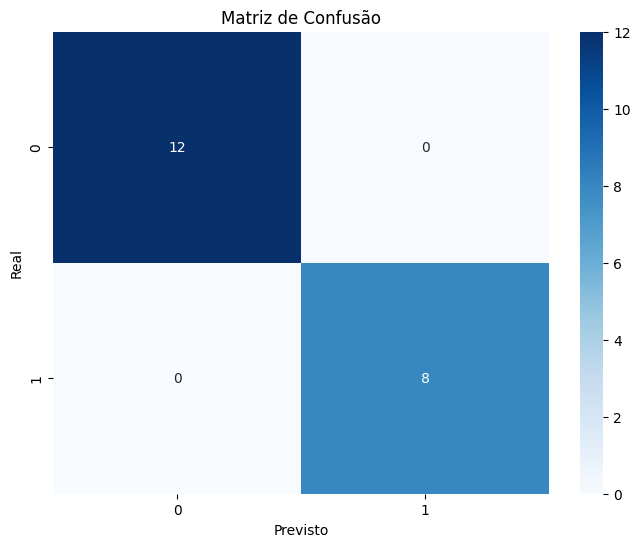

In [24]:
# Visualização dos resultados
print("\nMatriz de Confusão:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()